**Import the Packages**
---
In this section we will be importing all the packages needed to analyze the Global Poverty and Inequality Dataset

In [6]:
from google.colab import drive
!cp -r "/content/drive/MyDrive/Global Poverty and Inequality Project/poverty_dataset.csv" "/content/drive/MyDrive"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importing the Data**
---
In this section we will be importing the dataset "poverty_dataset.csv" and then creating a copy of the dataset into a dataframe to examine and manipulate

In [8]:
# Reading in the dataset from my google drive
raw_cvs_data = pd.read_csv('/content/drive/MyDrive/Global Poverty and Inequality Project/poverty_dataset.csv')

# Creating a dataframe using pandas from the 'poverty_dataset.cvs' file
df_comp = raw_cvs_data

FileNotFoundError: ignored

Examining the Data

In [ ]:
# Preview of the dataset being used
df_comp.head()

,country,year,reporting_level,welfare_type,headcount_ratio_international_povline,headcount_international_povline,avg_shortfall_international_povline,total_shortfall_international_povline,income_gap_ratio_international_povline,poverty_gap_index_international_povline,...,decile6_share,decile7_share,decile8_share,decile9_share,decile10_share,gini,mld,polarization,palma_ratio,s80_s20_ratio
0,Albania,2016,national,income,6.681604,192170,0.701224,134754.2190,36.906527,2.465952,...,8.862651,10.573946,12.912911,16.630367,27.466949,0.385656,0.273740,0.350360,1.696002,8.286575
1,Albania,2016,national,income,5.795102,166673,0.820591,136770.3308,38.167014,2.211818,...,8.862651,10.573946,12.912911,16.630367,27.466949,0.385656,0.273740,0.350360,1.696002,8.286575
2,Albania,2017,national,income,6.073821,174529,0.639209,111560.5174,33.642582,2.043394,...,9.073751,10.648661,12.902116,16.392251,26.453363,0.370951,0.254175,0.332537,1.567077,7.732992
3,Armenia,1996,national,income,14.216143,450398,0.480189,216276.0233,25.273089,3.592861,...,7.575120,9.185150,11.444721,15.377794,35.221513,0.444186,0.335479,0.382662,2.363050,9.147206
4,Australia,1981,national,income,0.993503,148300,0.928378,137678.4968,48.862014,0.485445,...,9.063190,10.649823,12.723123,15.849857,23.301636,0.313258,0.187102,0.281578,1.132451,5.100427


**Data Preparation**
---
In this section we will isolating the columns that are important to our analysis. In this analysis we are going to focus on the key poverty and inequality indicators. (Gini, Mean Log Deviation (MLD), Polarization, and Palma Ratio)


In [ ]:
# List of columns to keep
columns_to_keep = ['country', 'year', 'gini', 'mld', 'polarization', 'palma_ratio']

# Remove columns that are not in the list
df_comp = df_comp.drop(columns=df_comp.columns[~df_comp.columns.isin(columns_to_keep)])

In [ ]:
# Descriptive statistics of the key indicators
df_comp.describe()

,year,gini,mld,polarization,palma_ratio
count,2338.000000,2330.000000,2330.000000,2330.000000,2330.000000
mean,2006.262618,0.381873,0.284649,0.334539,2.008293
std,9.731719,0.099040,0.155921,0.110966,1.268436
min,1967.000000,0.201866,0.068986,0.150905,0.684218
25%,2000.000000,0.304473,0.163347,0.250022,1.125389
50%,2008.000000,0.351905,0.227705,0.295886,1.427470
75%,2014.000000,0.467070,0.388132,0.421894,2.680698
max,2020.000000,0.632951,0.865253,0.695048,7.540501


**Data Cleaning**

In [ ]:
# Identifying any missing values in the dataframe
df_comp.isna().sum()

country         0
year            0
gini            8
mld             8
polarization    8
palma_ratio     8
dtype: int64

Due to this dataset having multiple reports for some years we will be averaging the indicators for each year to mantain consistancy, meanwhile removing the missing values and duplicates.

In [ ]:
# Removes the rows with missing values
df_comp = df_comp.dropna()

# Group the data by 'country' and 'year' and calculate the mean for each group
df_comp.groupby(['country', 'year']).mean().reset_index()

# Remove duplicate rows
df_comp = df_comp.drop_duplicates()

**Plotting the Data**
---
This section is not too straight forward as using these key poverty indicators, pandas want to sum all the indicator for the time period so specifying the country then displaying the plots is needed. For the examples below, I will be using the Unitied States, Australia, and Haiti.

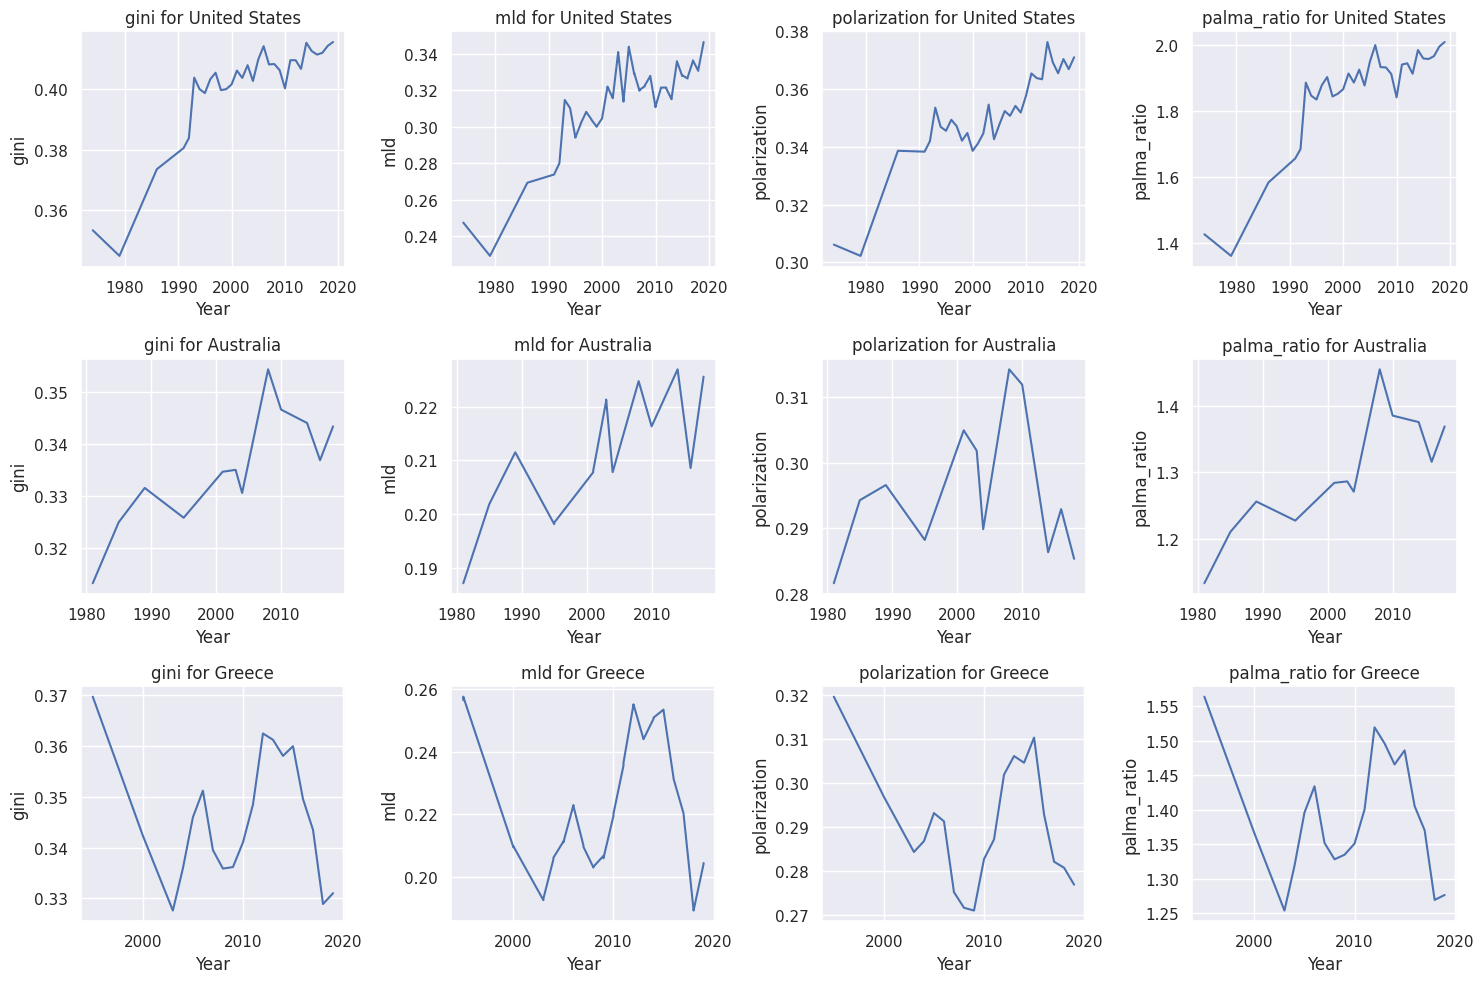

In [ ]:
# Random sample of a few select countries from the dataset
countries = ['United States', 'Australia', 'Greece']

# Creating a subplot with 3 rows and 4 columns
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
axs = axs.flatten()  # Convert the axs object to a 1-dimensional array

# List of columns to plot
indicators = ['gini', 'mld', 'polarization', 'palma_ratio']

# Loop through the countries and plot the data for each column
for i, country in enumerate(countries):
    country_data = df_comp[df_comp['country'] == country]
    country_data = country_data.sort_values('year')

    for j, col in enumerate(indicators):
        axs[i * len(indicators) + j].plot(country_data['year'], country_data[col])
        axs[i * len(indicators) + j].set_title(f'{col} for {country}')
        axs[i * len(indicators) + j].set_xlabel('Year')
        axs[i * len(indicators) + j].set_ylabel(col)

plt.tight_layout()
plt.show()


**QQ Plot**
---
In this section we will be contructing a QQ plot to identify if these indicators are normally distrubuted or not. This will aid in future analysis for forecasting.


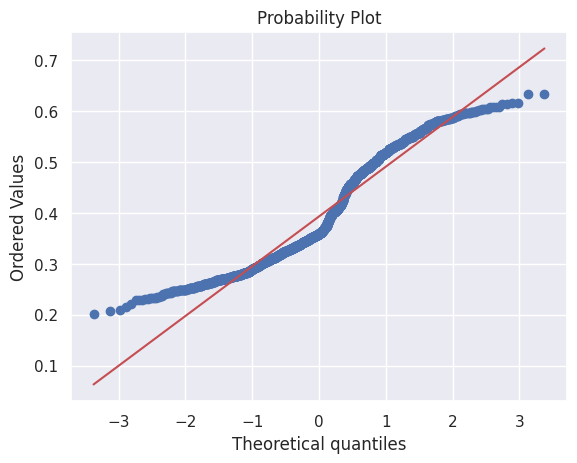

In [ ]:
import scipy.stats
import pylab

scipy.stats.probplot(df_comp.gini, plot = pylab)
pylab.show()
# These indicators are not normally distrubited so we will have to keep that in mind when using time series forcasting

**Time Series Analysis**
---
In this section we will be conducting a time sereis analysis to forecast these indicators to make predictions if these countries are likely to improve or stay impoverished. Important to note there is an inconsitancy in reporting per year so we will have to select only one country at a time (perferably one with many years of reported data for a 80/20 sets).


In [ ]:
# Pip installing the auto ARIMA model
!pip install pmdarima
from pmdarima import auto_arima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00


In [ ]:
# Convert 'year' column to datetime
df_comp.loc[:, 'year'] = pd.to_datetime(df_comp['year'], format='%Y')

# Set 'year' as the index
df_comp.set_index('year', inplace=True)

In [ ]:
# Select the country **This can be changed out for any country in the dataset, I only used the US because of I know it has a large number of reports
country = 'United States'

# Select data for the specific country
country_data = df_comp[df_comp['country'] == country]

# Splitting the data into a train and test set
size = int(len(country_data) * 0.8)

# Training set
train_set = country_data.iloc[:size]

# Test set
test_set = country_data.iloc[size:]


In [ ]:
# Convert the index to a datetime object
train_set.index = pd.to_datetime(train_set.index)
test_set.index = pd.to_datetime(test_set.index)

# Interpolate missing values
train_set = train_set.interpolate()
test_set = test_set.interpolate()

# Resample to yearly frequency
train_set = train_set.select_dtypes(include='number')  # Select only numeric columns
train_set = train_set.resample('Y').mean()
test_set = test_set.select_dtypes(include='number')  # Select only numeric columns
test_set = test_set.resample('Y').mean()

In [ ]:
print(df_comp.columns)

Index(['country', 'gini', 'mld', 'polarization', 'palma_ratio'], dtype='object')


In [ ]:
# Preview of the data so far
print(train_set.describe())
print(test_set.describe())

            gini        mld  polarization  palma_ratio
count  26.000000  26.000000     26.000000    26.000000
mean    0.397629   0.305524      0.345623     1.829288
std     0.017015   0.026665      0.014403     0.159037
min     0.345002   0.229293      0.302239     1.360074
25%     0.399617   0.300567      0.342045     1.840866
50%     0.403321   0.312533      0.347066     1.881024
75%     0.407424   0.321339      0.353280     1.921292
max     0.413986   0.343801      0.365437     1.998448
           gini       mld  polarization  palma_ratio
count  6.000000  6.000000      6.000000     6.000000
mean   0.413327  0.334028      0.369918     1.977450
std    0.001762  0.007199      0.003775     0.021016
min    0.411219  0.326737      0.365504     1.956331
25%    0.411951  0.328793      0.367519     1.959802
50%    0.413233  0.333356      0.369865     1.974254
75%    0.414857  0.336127      0.370886     1.991348
max    0.415356  0.346398      0.376313     2.007829


**Auto ARIMA Forecasting**

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-270.572, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-277.973, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-276.444, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-276.497, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-278.305, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-275.294, Time=0.55 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.554 seconds
Model summary for gini:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 140.153
Date:                Fri, 02 Jun 2023   AIC                           -278.305
Time:                        23:42:50   BIC                           -276.642
Sample:                    12-31-1974   HQIC                     

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-219.351, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-222.607, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-225.207, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-225.197, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-223.940, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-223.324, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-223.348, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-221.351, Time=0.93 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-225.843, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-223.850, Time=0.39 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-223.848, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-225.560, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-221.862, Time=0.43 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.881 seconds
Model summary for mld:
                               SARIMAX Res

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-264.829, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-271.257, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-270.015, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-270.210, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-271.623, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.953 seconds
Model summary for polarization:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 136.812
Date:                Fri, 02 Jun 2023   AIC                           -271.623
Time:                        23:42:56   BIC                           -269.960
Sample:                    12-31-1974   HQIC                          -271.026
                         -

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-98.557, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-105.548, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-104.346, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-104.438, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-105.867, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-102.481, Time=0.77 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 2.973 seconds
Model summary for palma_ratio:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   40
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  53.934
Date:                Fri, 02 Jun 2023   AIC                           -105.867
Time:                        23:42:59   BIC                           -104.204
Sample:                    12-31-1974   HQIC                          -105.270
                       

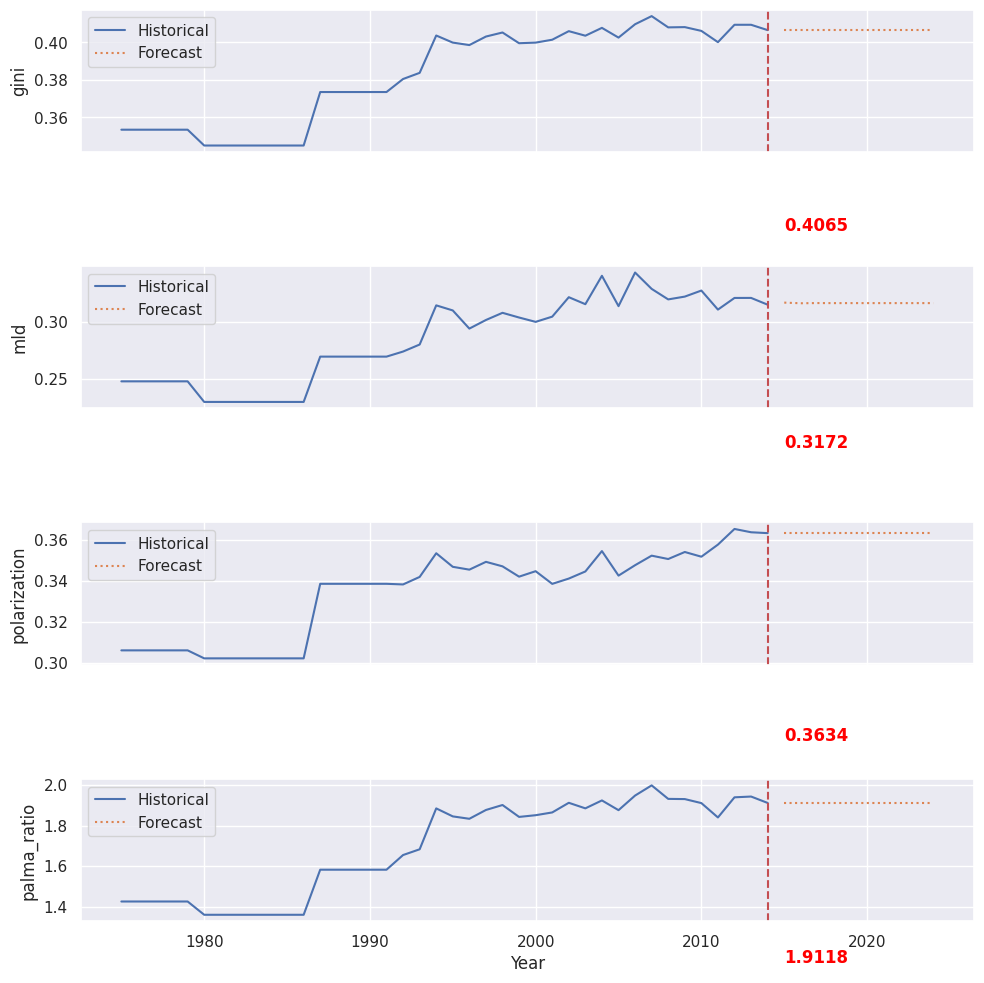

In [ ]:
# Specify the list of poverty indicators
poverty_indicators = ['gini', 'mld', 'polarization', 'palma_ratio']

# Preprocess data by filling missing values with forward fill (ffill)
train_set_filled = train_set.fillna(method='ffill')
test_set_filled = test_set.fillna(method='ffill')

# Set up the plot
fig, axs = plt.subplots(len(poverty_indicators), 1, figsize=(10, 10), sharex=True)

# Loop over each poverty indicator
for i, indicator in enumerate(poverty_indicators):
    # Fit Auto ARIMA model
    model = auto_arima(train_set_filled[indicator], seasonal=False, m=12, trace=True, suppress_warnings=True)

    # Print the model summary
    print(f"Model summary for {indicator}:")
    print(model.summary())

    # Forecast future values
    forecast = model.predict(n_periods=10)  # Specify the number of periods to forecast

    # Generate index for forecasted values
    forecast_index = pd.date_range(start=test_set_filled.index[0], periods=len(forecast), freq='AS')

    # Plot historical data
    axs[i].plot(train_set_filled.index, train_set_filled[indicator], label='Historical')

    # Plot forecasted values
    axs[i].plot(forecast_index, forecast, label='Forecast', linestyle='dotted')

    # Add legend and labels
    axs[i].legend()
    axs[i].set_ylabel(indicator)

    # Add a vertical line to indicate the end of historical data
    axs[i].axvline(x=train_set_filled.index[-1], color='r', linestyle='--')

    # Add forecasted value as red, bold text below the dotted red line
    text_x = forecast_index[0]
    text_y = axs[i].get_ylim()[0] - 0.1 * axs[i].get_ylim()[1]
    axs[i].text(text_x, text_y, f'{forecast[0]:.4f}', color='red', weight='bold')

# Add x-axis label
plt.xlabel('Year')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
